In [1]:
import cv2

In [2]:
import matplotlib.pyplot as plt

### Importing a model

In [3]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [4]:
model = cv2.dnn_DetectionModel(frozen_model, config_file)

### Creating a label

In [5]:
classLabels = []
file_name = 'Labels.txt'
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')
    
fpt.close()

In [6]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5) # 255/2 = 127.5
model.setInputMean((127.5, 127.5, 127.5)) # since mobilenet takes input [-1,1]
model.setInputSwapRB(True) # No need to cvt to RGB

<dnn_Model 00000158668A2730>

### Read an Image


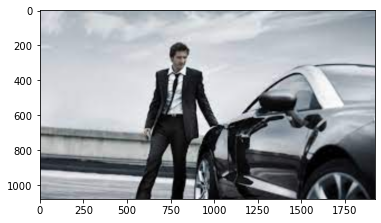

In [7]:
img = cv2.imread('resources/man_and_car.jpg')
img = cv2.resize(img, (1920,1080))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [8]:
ClassIndex, confidence, bbox = model.detect(img, confThreshold=0.5)

In [9]:
ClassIndex, confidence, bbox

(array([[3],
        [1]], dtype=int32),
 array([[0.6109835 ],
        [0.52879244]], dtype=float32),
 array([[909, 302, 996, 777],
        [556, 176, 482, 904]], dtype=int32))

In [10]:
ClassIndex.shape, confidence.shape, bbox.shape

((2, 1), (2, 1), (2, 4))

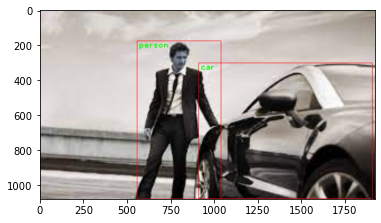

In [11]:
# we need to flatten the list so that we can loop it
fontScale = 3
fontFace = cv2.FONT_HERSHEY_PLAIN

for classIdx, conf ,box in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img, box, (255,0,0), 2)
    cv2.putText(img, classLabels[classIdx-1], (box[0]+10, box[1]+40), fontFace, fontScale, (0,255,0), 3)
    
plt.imshow(img)

### Video Demo

In [16]:
cap = cv2.VideoCapture('resources/street.mp4')
if not cap.isOpened():
    raise IOError("Cannot open the video")


fontScale = 3
fontFace = cv2.FONT_HERSHEY_PLAIN

while True:
    sucess, img = cap.read()
    img = cv2.resize(img, (1024,768))
    ClassIndex, confidence, bbox = model.detect(img, confThreshold=0.5)
    if len(ClassIndex)!= 0:
        for classIdx, conf ,box in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            cv2.rectangle(img, box, (255,0,0), 2)
            cv2.putText(img, classLabels[classIdx-1], (box[0]+10, box[1]+40), fontFace, fontScale, (0,255,0), 1)

    cv2.imshow('Result', img)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break;
        

cap.release()
cv2.destroyAllWindows()

error: OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-vi271kac\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
